In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def imf_kroupa(m):
    if 0.01<=m<0.08:
        return m**(-0.3)
    if 0.08<=m<0.5:
        return m**(-1.3)
    if 0.5<=m<1:
        return m**(-2.3)
    if 1<=m:
        return m**(-2.3)

In [3]:
def masas_imf(num_estrellas, m_min=0.08, m_max=100):
    masas = []
    while len(masas) < num_estrellas:
        m = np.random.uniform(m_min, m_max)
        p = imf_kroupa(m)
        if np.random.uniform(0, 1) < p:
            masas.append(m)
    return np.array(masas)

In [4]:
s1 = 100
s2 = 1000
s3 = 10000
s4 = 100000
s5 = 1000000

In [5]:
m_1 = masas_imf(s1)
m_2 = masas_imf(s2)
m_3 = masas_imf(s3)
m_4 = masas_imf(s4)
m_5 = masas_imf(s5)

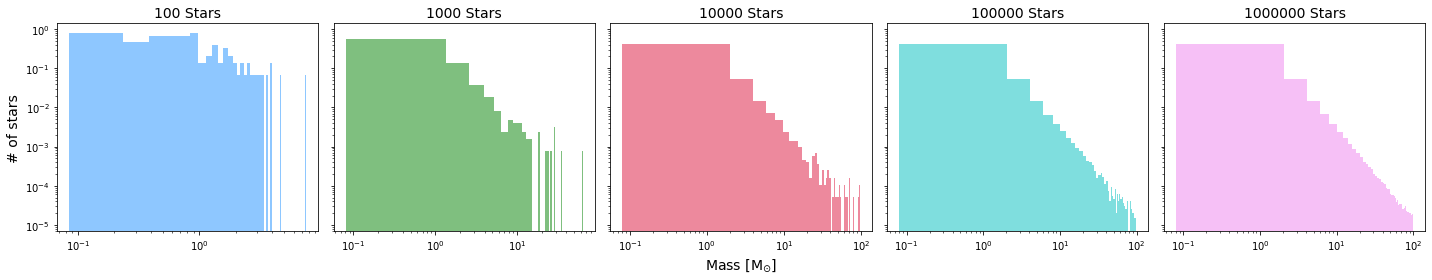

In [12]:
fig, axs = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

samples = [m_1, m_2, m_3, m_4, m_5]
colors = ['dodgerblue', 'g', 'crimson', 'c', 'violet']
titles = ['100 Stars', '1000 Stars', '10000 Stars', '100000 Stars', '1000000 Stars']

for i, ax in enumerate(axs):
    ax.hist(samples[i], bins=50, density=True, alpha=0.5, color=colors[i])
    ax.set_title(titles[i], fontsize = 14)
    ax.set_xscale('log')
    ax.set_yscale('log') 

axs[0].set_ylabel('# of stars', fontsize = 14)
axs[2].set_xlabel('Mass [M$_{\odot}$]', fontsize = 14)

plt.tight_layout()
plt.show()

In [5]:
t_1 = np.random.uniform(0, 10, s1)
t_2 = np.random.uniform(0, 10, s2)
t_3 = np.random.uniform(0, 10, s3)
t_4 = np.random.uniform(0, 10, s4)
t_5 = np.random.uniform(0, 10, s5)

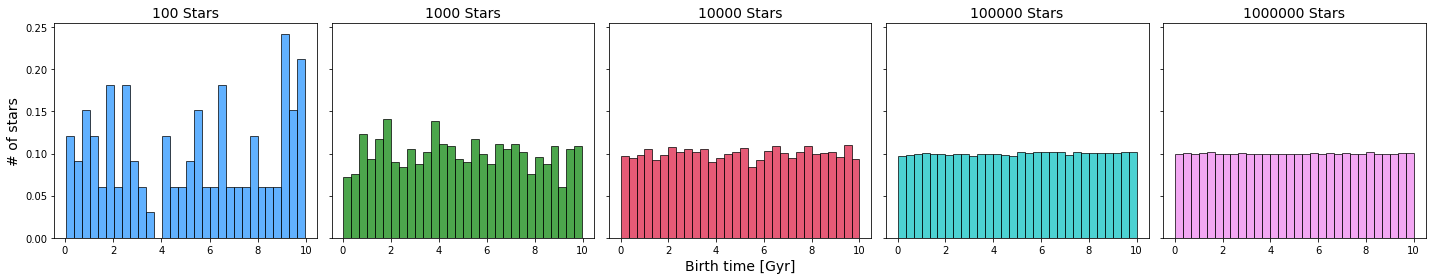

In [13]:
fig, axs = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

samples = [t_1, t_2, t_3, t_4, t_5]
colors = ['dodgerblue', 'g', 'crimson', 'c', 'violet'] 
titles = ['100 Stars', '1000 Stars', '10000 Stars', '100000 Stars', '1000000 Stars']

for i, ax in enumerate(axs):
    ax.hist(samples[i], bins=30, density=True, alpha=0.7, color=colors[i], edgecolor='black')
    ax.set_title(titles[i], fontsize = 14)

axs[0].set_ylabel('# of stars', fontsize = 14)
axs[2].set_xlabel('Birth time [Gyr]', fontsize = 14)

plt.tight_layout()
plt.show()

In [14]:
t_1 = 10 - t_1
t_2 = 10 - t_2
t_3 = 10 - t_3
t_4 = 10 - t_4
t_5 = 10 - t_5

In [15]:
def main_sequence(m):
    t = 10e10 / (m**(2.5))
    return t/10e9

In [16]:
t_main_1 = [main_sequence(m) for m in m_1]
t_main_2 = [main_sequence(m) for m in m_2]
t_main_3 = [main_sequence(m) for m in m_3]
t_main_4 = [main_sequence(m) for m in m_4]
t_main_5 = [main_sequence(m) for m in m_5]

In [17]:
def time_mass(t, t_main, m):
    result = []
    for a, b, c in zip(t, t_main, m):
        if a > b:
            result.append((a,c))
    return result

In [18]:
def main_sequence(t, t_main, m):
    result = []
    for a, b, c in zip(t, t_main, m):
        if a < b:
            result.append((a,c))
    return result

In [19]:
time_mass_1_both = time_mass(t_1, t_main_1, m_1)
time_mass_2_both = time_mass(t_2, t_main_2, m_2)
time_mass_3_both = time_mass(t_3, t_main_3, m_3)
time_mass_4_both = time_mass(t_4, t_main_4, m_4)
time_mass_5_both = time_mass(t_5, t_main_5, m_5)

In [20]:
main_sequence_1_both = main_sequence(t_1, t_main_1, m_1)
main_sequence_2_both = main_sequence(t_2, t_main_2, m_2)
main_sequence_3_both = main_sequence(t_3, t_main_3, m_3)
main_sequence_4_both = main_sequence(t_4, t_main_4, m_4)
main_sequence_5_both = main_sequence(t_5, t_main_5, m_5)

In [23]:
time_mass_1 = [m for t, m in time_mass_1_both]
time_mass_2 = [m for t, m in time_mass_2_both]
time_mass_3 = [m for t, m in time_mass_3_both]
time_mass_4 = [m for t, m in time_mass_4_both]
time_mass_5 = [m for t, m in time_mass_5_both]

In [26]:
time_mass_ms_1 = [m for t, m in main_sequence_1_both]
time_mass_ms_2 = [m for t, m in main_sequence_2_both]
time_mass_ms_3 = [m for t, m in main_sequence_3_both]
time_mass_ms_4 = [m for t, m in main_sequence_4_both]
time_mass_ms_5 = [m for t, m in main_sequence_5_both]

In [45]:
print('Main sequence 1: ',len(time_mass_ms_1))
print('Main sequence 2: ',len(time_mass_ms_2))
print('Main sequence 3: ',len(time_mass_ms_3))
print('Main sequence 4: ',len(time_mass_ms_4))
print('Main sequence 5: ',len(time_mass_ms_5))

Main sequence 1:  74
Main sequence 2:  729
Main sequence 3:  7078
Main sequence 4:  70315
Main sequence 5:  700984


In [29]:
edad_1 = [t for t, m in time_mass_1_both]
edad_2 = [t for t, m in time_mass_2_both]
edad_3 = [t for t, m in time_mass_3_both]
edad_4 = [t for t, m in time_mass_4_both]
edad_5 = [t for t, m in time_mass_5_both]

In [30]:
edad_ms_1 = [t for t, m in main_sequence_1_both]
edad_ms_2 = [t for t, m in main_sequence_2_both]
edad_ms_3 = [t for t, m in main_sequence_3_both]
edad_ms_4 = [t for t, m in main_sequence_4_both]
edad_ms_5 = [t for t, m in main_sequence_5_both]

In [31]:
def remnant(m_i):
    if 0.08<=m_i<9:
        m_f = (0.109*m_i) + 0.394
        return 'White Dwarf',m_i,m_f
    if 9<=m_i<=13:
        m_f = 2.24 + 0.508 *(m_i - 14.75) + 0.125 * (m_i - 14.75)**2 + 0.011 * (m_i - 14.75)**3
        return 'Neutron Star',m_i,m_f
    if 13<m_i<15:
        m_f = 0.123 + (0.112*m_i)
        return 'Neutron Star',m_i,m_f
    if 15<=m_i<17.8:
        m_f = 0.996  + (0.0384*m_i)
        return 'Neutron Star',m_i,m_f
    if 17.8<m_i<18.5:
        m_f = - 0.02 + (0.1*m_i)
        return 'Neutron Star', m_i, m_f
    if 18.5 <= m_i < 40:
        M_BH_core = -2.049 + 0.4140 * m_i
        M_BH_all = 15.52 - 0.3294 * (m_i - 25.97)**2 - 0.02121 * (m_i - 25.97)**2 + 0.003120 * (m_i - 25.97)**3
        m_f = 0.9 * M_BH_core + (1 - 0.9) * M_BH_all
        return 'Black Hole',m_i,m_f
    if 40<=m_i:
        m_f = 5.697 + 7.8598e8*m_i**(-4.858)
        return 'Black Hole',m_i,m_f

In [32]:
remnant_1 = [remnant(m) for m in time_mass_1]
remnant_2 = [remnant(m) for m in time_mass_2]
remnant_3 = [remnant(m) for m in time_mass_3]
remnant_4 = [remnant(m) for m in time_mass_4]
remnant_5 = [remnant(m) for m in time_mass_5]

In [35]:
nombres_1 = [tipo for tipo, m_i, m_f in remnant_1]
nombres_2 = [tipo for tipo, m_i, m_f in remnant_2]
nombres_3 = [tipo for tipo, m_i, m_f in remnant_3]
nombres_4 = [tipo for tipo, m_i, m_f in remnant_4]
nombres_5 = [tipo for tipo, m_i, m_f in remnant_5]

In [218]:
m_f_1 = [m_f for tipo, m_i, m_f in remnant_1]
m_f_2 = [m_f for tipo, m_i, m_f in remnant_2]
m_f_3 = [m_f for tipo, m_i, m_f in remnant_3]
m_f_4 = [m_f for tipo, m_i, m_f in remnant_4]
m_f_5 = [m_f for tipo, m_i, m_f in remnant_5]

<ipython-input-38-8008d827f457>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right', fontsize = 14)


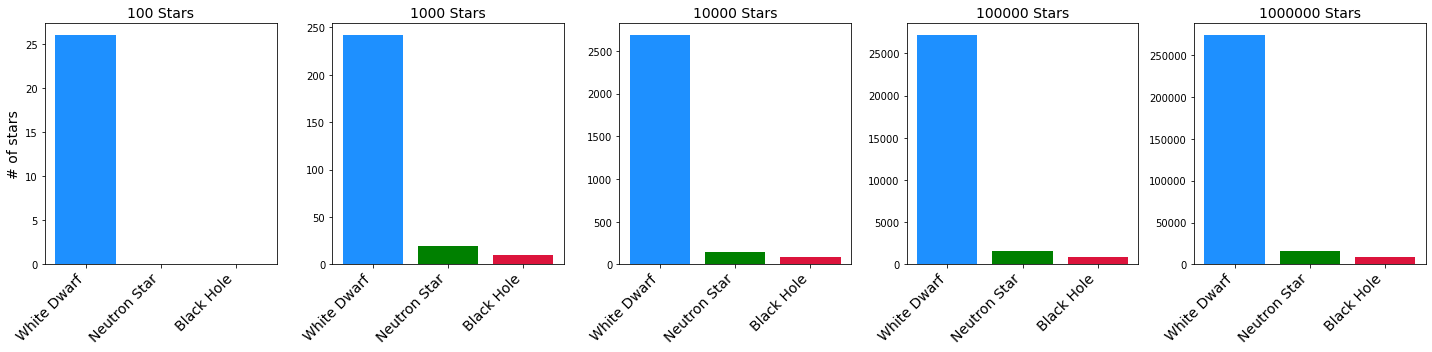

In [38]:
def total_remanentes(remnant_list):
    counts = {'White Dwarf': 0, 'Neutron Star': 0, 'Black Hole': 0}
    for tipo, m_i, m_f in remnant_list:
        counts[tipo] += 1
    return counts

remnants = [remnant_1, remnant_2, remnant_3, remnant_4, remnant_5]
nombres = ['100 Stars', '1000 Stars', '10000 Stars', '100000 Stars', '1000000 Stars']
labels = ['White Dwarf', 'Neutron Star', 'Black Hole']


fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for ax, remnant_list, nombre in zip(axes, remnants, nombres):
    counts = total_remanentes(remnant_list)
    values = [counts[label] for label in labels]
    ax.bar(labels, values, color=['dodgerblue', 'g', 'crimson'])
    ax.set_title(nombre, fontsize = 14)
    ax.set_xticklabels(labels, rotation=45, ha='right', fontsize = 14)

axes[0].set_ylabel('# of stars', fontsize = 14)

plt.tight_layout()
plt.show()

In [41]:
tipos_1 = total_remanentes(remnant_1)
tipos_2 = total_remanentes(remnant_2)
tipos_3 = total_remanentes(remnant_3)
tipos_4 = total_remanentes(remnant_4)
tipos_5 = total_remanentes(remnant_5)

In [46]:
print('Remanentes 1: ',tipos_1)
print('Remanentes 2: ',tipos_2)
print('Remanentes 3: ',tipos_3)
print('Remanentes 4: ',tipos_4)
print('Remanentes 5: ',tipos_5)

Remanentes 1:  {'White Dwarf': 26, 'Neutron Star': 0, 'Black Hole': 0}
Remanentes 2:  {'White Dwarf': 242, 'Neutron Star': 19, 'Black Hole': 10}
Remanentes 3:  {'White Dwarf': 2687, 'Neutron Star': 148, 'Black Hole': 87}
Remanentes 4:  {'White Dwarf': 27179, 'Neutron Star': 1617, 'Black Hole': 889}
Remanentes 5:  {'White Dwarf': 274091, 'Neutron Star': 15936, 'Black Hole': 8989}


/usr/local/lib/python3.8/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


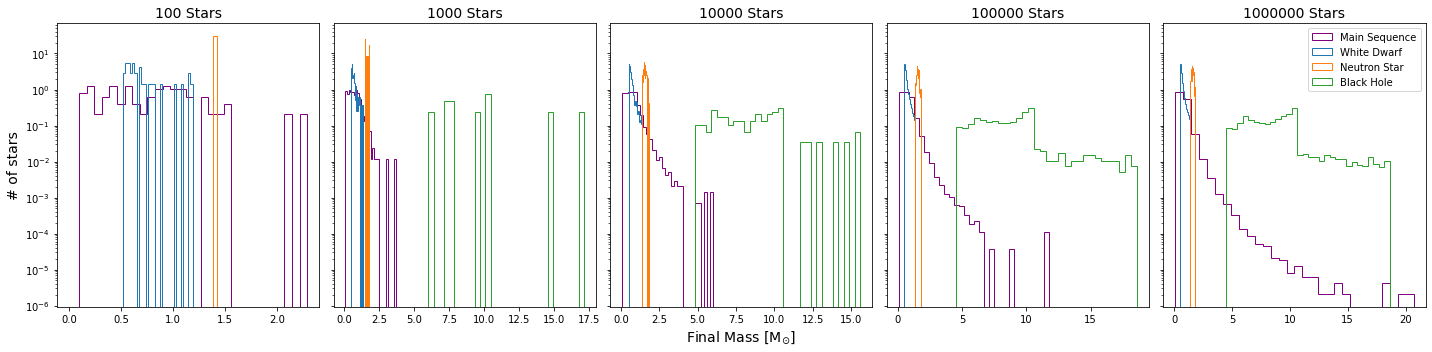

In [220]:
def filtrar_masas_por_clase(remnant_list, clase):
    return [m_f for tipo, m_i, m_f in remnant_list if tipo == clase]

clases = ['Main Sequence', 'White Dwarf', 'Neutron Star', 'Black Hole']
remnant_listas = [remnant_1, remnant_2, remnant_3, remnant_4, remnant_5]
labels = ['100 Stars', '1000 Stars', '10000 Stars', '100000 Stars', '1000000 Stars']
main_sequence_masas = [time_mass_ms_1, time_mass_ms_2, time_mass_ms_3, time_mass_ms_4, time_mass_ms_5]

fig, axes = plt.subplots(1, len(remnant_listas), figsize=(20, 5), sharey=True)

for i, (remnant, label, ms_masas) in enumerate(zip(remnant_listas, labels, main_sequence_masas)):
    axes[i].hist(ms_masas, bins=30, histtype='step', density=True, label='Main Sequence', linewidth=1, color='purple')
    
    for clase in clases[1:]:
        masas_clase = filtrar_masas_por_clase(remnant, clase)
        axes[i].hist(masas_clase, bins=30, histtype='step', density=True, label=clase, linewidth=1)
    
    axes[i].set_yscale('log')
    
    axes[i].set_title(label, fontsize = 14)
    if i == 0:
        axes[i].set_ylabel('# of stars', fontsize = 14)
    if i == len(remnant_listas) - 1:
        axes[i].legend()

axes[2].set_xlabel('Final Mass [M$_{\odot}$]', fontsize = 14)

plt.tight_layout()
plt.show()

In [221]:
def remnant_time(mass_list, age_list):
    result = []
    for m_i, t in zip(mass_list, age_list):
        if 0.08 <= m_i < 9:
            result.append(('White Dwarf', t))
        elif 9 <= m_i <= 18.5:
            result.append(('Neutron Star', t))
        elif m_i > 18.5:
            result.append(('Black Hole', t))
    return result

In [222]:
remnant_1_time = remnant_time(time_mass_1, edad_1)
remnant_2_time = remnant_time(time_mass_2, edad_2)
remnant_3_time = remnant_time(time_mass_3, edad_3)
remnant_4_time = remnant_time(time_mass_4, edad_4)
remnant_5_time = remnant_time(time_mass_5, edad_5)

/usr/local/lib/python3.8/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


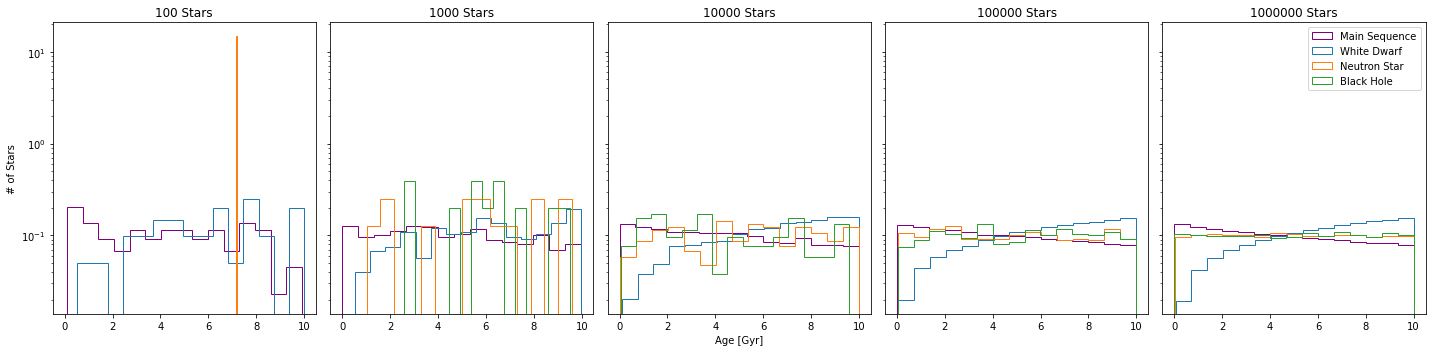

In [223]:
def filtrar_tiempos_por_clase(remnant_time_data, clase):
    return [t for tipo, t in remnant_time_data if tipo == clase]

remnant_tiempos_listas = [remnant_1_time, remnant_2_time, remnant_3_time, remnant_4_time, remnant_5_time]
main_sequence_tiempos = [edad_ms_1, edad_ms_2, edad_ms_3, edad_ms_4, edad_ms_5]
clases = ['Main Sequence', 'White Dwarf', 'Neutron Star', 'Black Hole']
labels = ['100 Stars', '1000 Stars', '10000 Stars', '100000 Stars', '1000000 Stars']

fig, axes = plt.subplots(1, len(remnant_tiempos_listas), figsize=(20, 5), sharey=True)

for i, (remnant_time, label, ms_tiempos) in enumerate(zip(remnant_tiempos_listas, labels, main_sequence_tiempos)):
    axes[i].hist(ms_tiempos, bins=15, histtype='step', density=True, label='Main Sequence', linewidth=1, color='purple')

    for clase in clases[1:]: 
        tiempos_clase = filtrar_tiempos_por_clase(remnant_time, clase)
        axes[i].hist(tiempos_clase, bins=15, histtype='step', density=True, label=clase, linewidth=1)
    
    axes[i].set_yscale('log')
    
    axes[i].set_title(label)
    if i == 0:
        axes[i].set_ylabel('# of Stars')
    if i == len(remnant_tiempos_listas) - 1: 
        axes[i].legend()

axes[2].set_xlabel('Age [Gyr]')

plt.tight_layout()
plt.show()